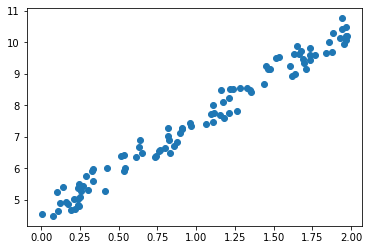

In [26]:
# Normal equation teeta que minimiza la funcion costo- (Xt*X)-1*XT*y
import numpy as np
import matplotlib.pyplot as plt

X = 2*np.random.rand(100,1)

y = 4+3*X+np.random.rand(100,1)
y2 = 4+3*X
plt.scatter(X,y)
plt.show()


In [29]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance 

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # formula de theeta explícito culpa del ruido gaussiano
theta_ideal = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y2)

print(theta_best) # O(2.4)-O(3)
print(theta_ideal)

[[4.50430597]
 [2.96897179]]
[[4.]
 [3.]]


In [85]:
X_new = np.array([[0], [2], [10]])
X_new_b = np.c_[np.ones((3, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 0],
       [ 2],
       [10]])

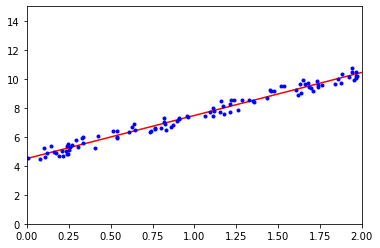

In [89]:
plt.plot(X_new, y_predict, "r-") 
plt.plot(X, y, "b.") 
plt.axis([0, 2, 0, 15]) 
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression #  como llegar al valor desde el LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.58401988]), array([[2.92222127]]))

In [45]:
lin_reg.predict(X_new) # predice los mismos valores que calculando con theta best

array([[ 4.58401988],
       [10.42846243],
       [33.80623263]])

In [46]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6) # least squares, lo usa LinearRegression
theta_best_svd # svd = singular value decomposition - O(2) vs O(3) de la ecuacion normal

array([[4.50430597],
       [2.96897179]])

In [8]:
# ecuación computa theeta = X+*y dnd X+ es la pseudo inversa 
np.linalg.pinv(X_b).dot(y) # primero es el intercept y el segundo el coef

array([[4.58401988],
       [2.92222127]])

In [9]:
# batch gradient descend - memory efficient and large training set

eta = 0.001 #learning rate
n_iterations = 10000
m=100 # tamanio del array

theta = np.random.randn(2,1) # random init

for iterations in range(n_iterations):
    gradients= 2/m* X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients


theta


array([[4.44791566],
       [3.03427501]])

In [75]:
# code for stochastic gradient
n_epochs = 2
t0,t1 = 5,50

def learning_schedule(t):
    return t0/(t+t1)

theta  = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m) 
        xi = X_b[random_index:random_index+1] 
        yi = y[random_index:random_index+1] 
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[4.37651128],
       [3.16605416]])

In [79]:
# usar Linear Regression using Stochastic GD with Scikit-Learn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1) # tol si la dif es de 0.001 frena y no llega a las 1000


In [84]:
sgd_reg.fit(X, y.ravel()) # ravel plancha la array para hacerlo 1-D
sgd_reg.intercept_, sgd_reg.coef_ # valore simil a los de Linear Regression

(array([4.48081161]), array([2.97678009]))